### Importing the required libraries for analysis and visualization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading the data from the csv file using the Pandas Library

In [2]:
lending_club_df = pd.read_csv("loan.csv")
lending_club_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the the null values in the dataframe

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    null_counts = lending_club_df.isnull().sum()
    print(null_counts)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Checking the Percentage of null values in each column

In [4]:
percent_null = lending_club_df.isnull().sum() / len(lending_club_df)

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percent_null*100)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

### We are going to remove those columns which have null values for equal to or more than 50% of the given datapoints

In [6]:
columns_to_drop = percent_null[percent_null >= 0.5].index
lending_club_df.drop(columns=columns_to_drop, inplace=True)

### We are going to convert some of the columns into decimal formats and remove the percentages sign

In [7]:
def convert_to_float(string_percentage):
    value = float(string_percentage[:-1])
    rounded_value = round(value, 2)
    return rounded_value

lending_club_df['int_rate'] = lending_club_df['int_rate'].apply(convert_to_float)

### We are going to convert revol_util into floating point numbers. We have 50 datapoints having null for the same. Considering that the number is minimal, we are going to assume it to be the most frequent value for this attribute which is 0

In [8]:
def convert_to_float(string_percentage):
    if pd.isna(string_percentage):
        return round(0, 2)
    value = float(string_percentage[:-1])
    rounded_value = round(value, 2)
    return rounded_value

lending_club_df['revol_util'] = lending_club_df['revol_util'].apply(convert_to_float)

### We are going to Standardize Precision for the some of the floating point variables as seen below

In [9]:
lending_club_df['funded_amnt_inv'] = lending_club_df['funded_amnt_inv'].round(2)
lending_club_df['collection_recovery_fee'] = lending_club_df['collection_recovery_fee'].round(2)
lending_club_df['total_rec_late_fee'] = lending_club_df['total_rec_late_fee'].round(2)
lending_club_df['total_pymnt'] = lending_club_df['total_pymnt'].round(2)

### We are now going to remove the attributes which are having the same value for all the rows as these do not provide information gain in any way

In [10]:
lending_club_df.drop(columns=[
    'acc_now_delinq',
    'delinq_amnt',
    'application_type',
    'policy_code',
    'collections_12_mths_ex_med',
    'initial_list_status',
    'tax_liens',
    'pymnt_plan',
    'out_prncp_inv'
], inplace=True)

In [11]:
lending_club_df.shape

(39717, 45)

### We are going to filter out rows where 'loan_status' is current and keep only those which either say 'Charged-Off' i.e. Defaulted or 'Fully Paid' i.e. Not Defaulted

In [12]:
lending_club_df = lending_club_df[lending_club_df['loan_status'] != "Current"]

In [13]:
lending_club_df.shape

(38577, 45)

### We are filtering out categorical variables and quantitative variables so that analysis can be made much easier

In [14]:
categorical_variables = lending_club_df.select_dtypes(include=['object']).columns.tolist()
quantitative_variables = lending_club_df.select_dtypes(exclude=['object']).columns.tolist()

In [15]:
categorical_variables

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d']

In [16]:
quantitative_variables

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies']

### We are going to remove 'id' and 'member_id' as they are extra columns that will be of no value to us

In [17]:
lending_club_df.drop(columns=[
    'id',
    'member_id'
], inplace=True)

### We are going to strip the left spaces and possible right spaces from the 'term' variable

In [18]:
lending_club_df['term'] = lending_club_df['term'].apply(lambda x: x.strip())

## DERIVING INSIGHTS FROM THE CLEANED DATA

### From this comparison, we see that the loans that defaulted had higher interest rates than those that were paid off. This is seen in the boxplot below which shows that the median rate for the loans that defaulted were greater than those that were fully paid

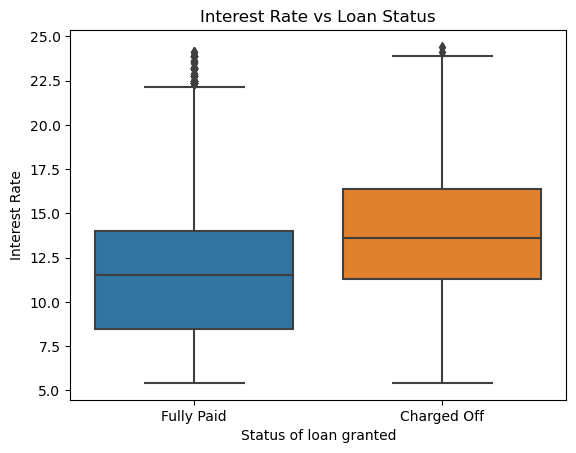

In [19]:
sns.boxplot(x=lending_club_df['loan_status'], y=lending_club_df['int_rate'])
plt.title("Interest Rate vs Loan Status")
plt.xlabel('Status of loan granted')
plt.ylabel('Interest Rate')
plt.show()

### This is interesting, considering that there is not much of a difference with respect to the amount loaned to the lendees as seen below

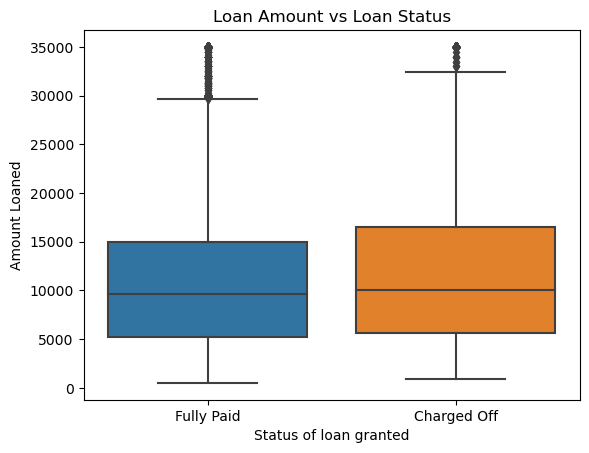

In [20]:
sns.boxplot(x=lending_club_df['loan_status'], y=lending_club_df['loan_amnt'])
plt.title("Loan Amount vs Loan Status")
plt.xlabel('Status of loan granted')
plt.ylabel('Amount Loaned')
plt.show()

### Furthermore we see that there is not much difference in the annual income of the non defaulters and the defaulters

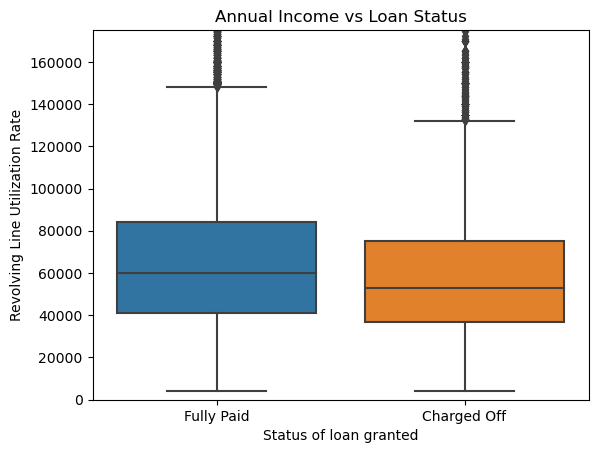

In [23]:
sns.boxplot(x=lending_club_df['loan_status'], y=lending_club_df['annual_inc'])
plt.title("Annual Income vs Loan Status")
plt.xlabel('Status of loan granted')
plt.ylabel('Revolving Line Utilization Rate')
plt.yscale('linear')
plt.ylim([0, lending_club_df['annual_inc'].quantile(0.975)])
plt.show()

### From this comparison, we see that the lendees that defaulted had a higher amount of credit being used relative to all available revolving credit. This is seen in the boxplot below which shows that the median Revolving Line Utilization Rate for the loans that defaulted were greater than those that were fully paid

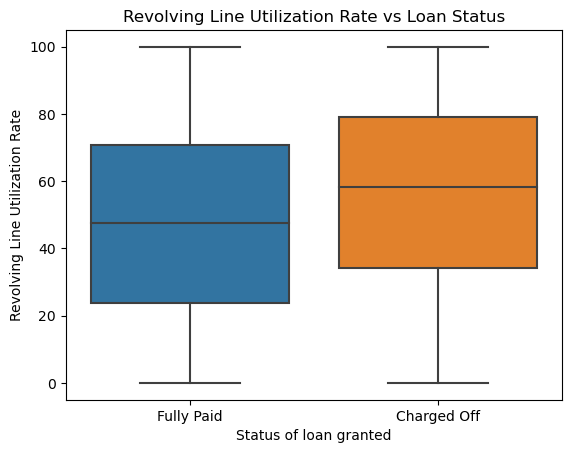

In [24]:
sns.boxplot(x=lending_club_df['loan_status'], y=lending_club_df['revol_util'])
plt.title("Revolving Line Utilization Rate vs Loan Status")
plt.xlabel('Status of loan granted')
plt.ylabel('Revolving Line Utilization Rate')
plt.show()

### Segregating the defaulters and non-defaulters for univariate analysis

In [25]:
defaulters = lending_club_df[lending_club_df['loan_status'] == "Charged Off"]

In [26]:
defaulters.shape

(5627, 43)

In [27]:
non_defaulters = lending_club_df[lending_club_df['loan_status'] == "Fully Paid"]

In [28]:
non_defaulters.shape

(32950, 43)

### Most of the loans that defaulted were either of type 'B', 'C' or 'D' with these three grades making up 69% of the loans that defaulted

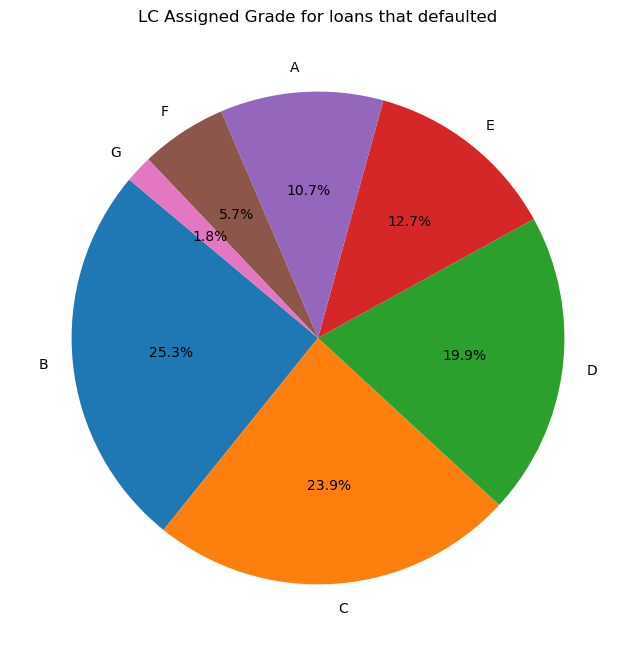

In [29]:
grade_counts = defaulters['grade'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: set the size of the figure
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('LC Assigned Grade for loans that defaulted')

plt.show()

### From the histogram below we can see that the highest number of defaulters are those that had worked for 10 years or more. Those with 6-9 years of experience had the lowest number of defaulters

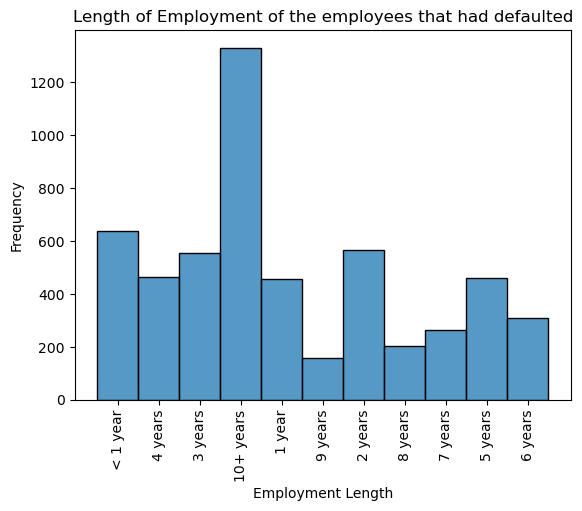

In [30]:
sns.histplot(defaulters['emp_length'], kde=False)
plt.xlabel('Employment Length')
plt.ylabel('Frequency')
plt.title('Length of Employment of the employees that had defaulted')
plt.xticks(rotation=90)

plt.show()

### From the histogram below we can see that a majority of defaulters are either paying rent or have a mortgage to pay

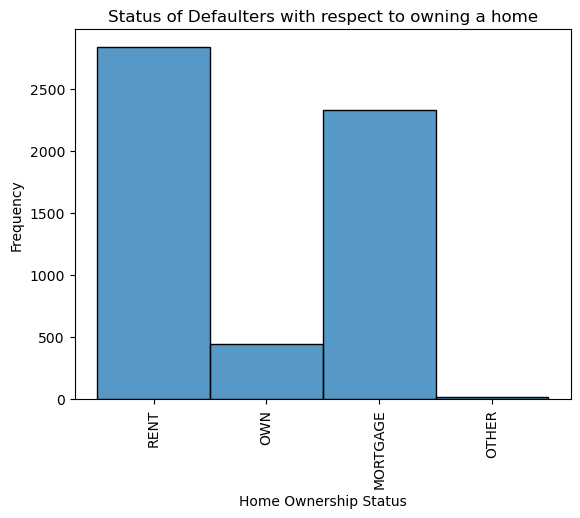

In [31]:
sns.histplot(defaulters['home_ownership'], kde=False)
plt.xlabel('Home Ownership Status')
plt.ylabel('Frequency')
plt.title('Status of Defaulters with respect to owning a home')
plt.xticks(rotation=90)

plt.show()

### From the below histogram we see that a major portion of the loan defaulters were from the states of 'CA', 'FL' and 'NY' with 'CA' having the highest number of defaulters

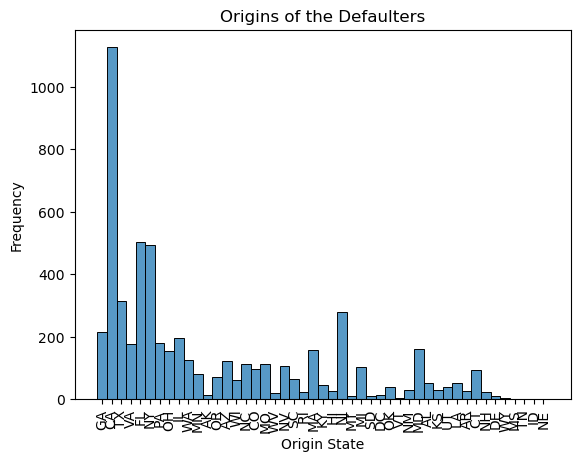

<Figure size 3000x3000 with 0 Axes>

In [32]:
sns.histplot(defaulters['addr_state'], kde=False)
plt.xlabel('Origin State')
plt.ylabel('Frequency')
plt.title('Origins of the Defaulters')
plt.xticks(rotation=90)
plt.figure(figsize=(30, 30))

plt.show()

### A Majority of the Defaulters had interest rates between 10% to 17.5%

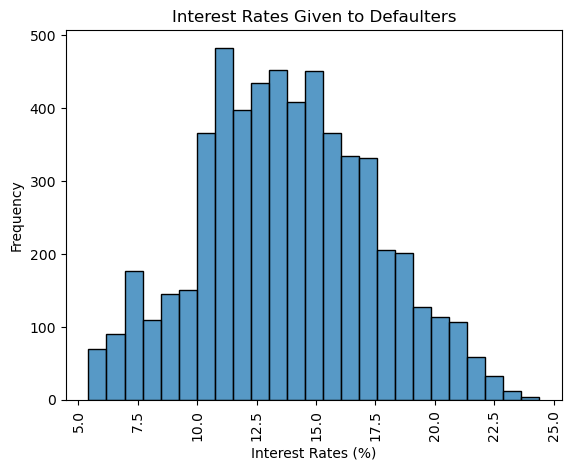

<Figure size 3000x3000 with 0 Axes>

In [33]:
sns.histplot(defaulters['int_rate'], bins=25, kde=False)
plt.xlabel('Interest Rates (%)')
plt.ylabel('Frequency')
plt.title('Interest Rates Given to Defaulters')
plt.xticks(rotation=90)
plt.figure(figsize=(30, 30))

plt.show()

### Majority of the defaulters had between 5 to 11 open credit lines in their credit files

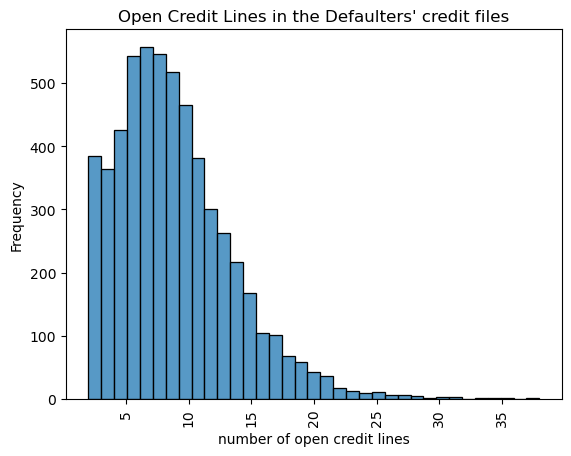

<Figure size 3000x3000 with 0 Axes>

In [34]:
sns.histplot(defaulters['open_acc'], bins=35, kde=False)
plt.xlabel('number of open credit lines')
plt.ylabel('Frequency')
plt.title('Open Credit Lines in the Defaulters\' credit files')
plt.xticks(rotation=90)
plt.figure(figsize=(30, 30))

plt.show()

### Most people end up taking loans for the purpose of debt consolidation

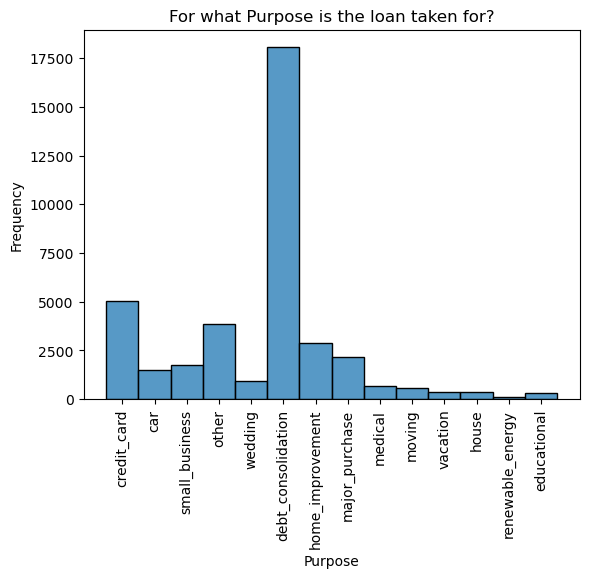

In [35]:
sns.histplot(lending_club_df['purpose'], kde=False)
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('For what Purpose is the loan taken for?')
plt.xticks(rotation=90)

plt.show()

### Most of the defaulters earn between 25000 and 75000

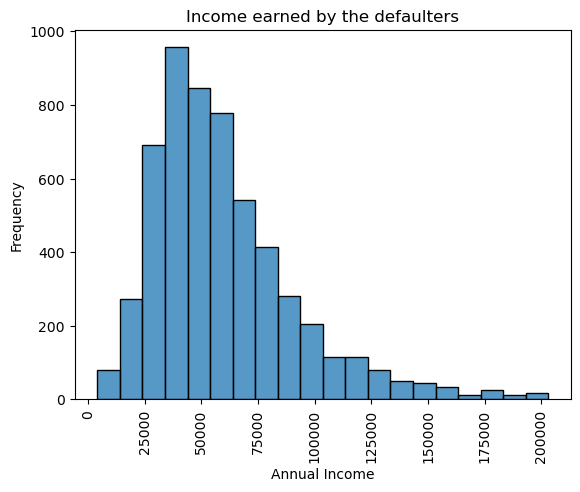

<Figure size 3000x3000 with 0 Axes>

In [36]:
sns.histplot(defaulters[defaulters['annual_inc'] < defaulters['annual_inc'].quantile(0.99)]['annual_inc'], bins=20, kde=False)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Income earned by the defaulters')
plt.xticks(rotation=90)
plt.figure(figsize=(30, 30))

plt.show()

### From the Heatmap below, 
### We see that installment is directly proportional to the loan_amnt, funded_amnt, and funded_amnt_inv
### We also see a strong correlation between pub_rec and pub_rec_bankruptcies

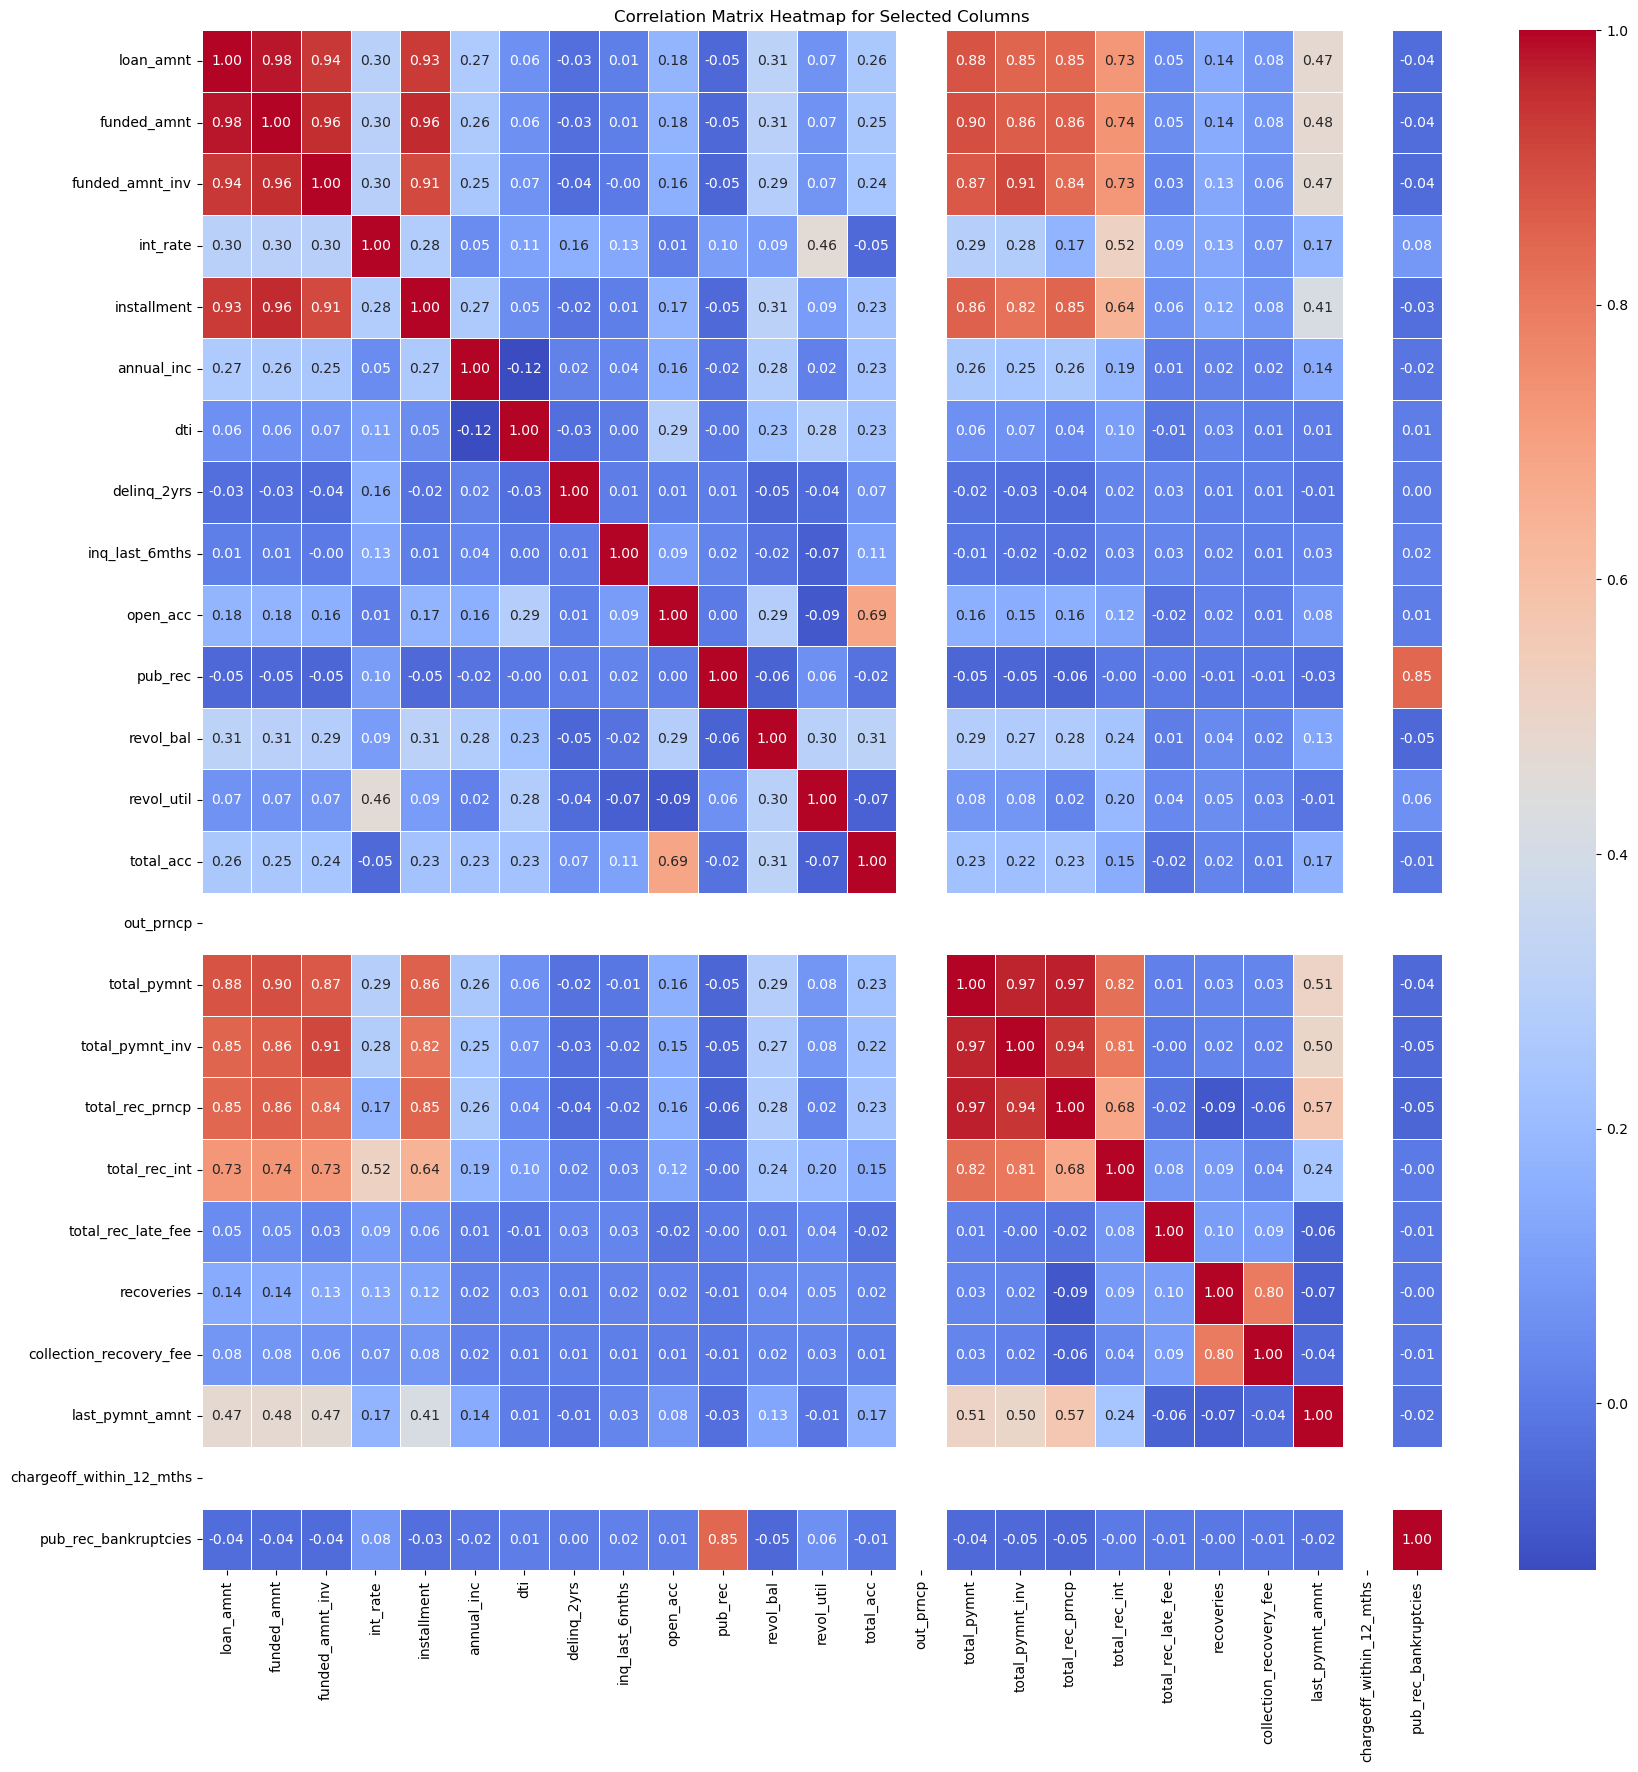

In [37]:
selected_columns = lending_club_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies']]

plt.figure(figsize=(20, 20))
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar=True)

# Optional: Add labels and title
plt.title('Correlation Matrix Heatmap for Selected Columns')

plt.show()

### Based on the plot below, there is not much of a difference in loan terms for defaulters, but a majority of the lendees who have paid off their loans have opted for the shorter term of 36 months

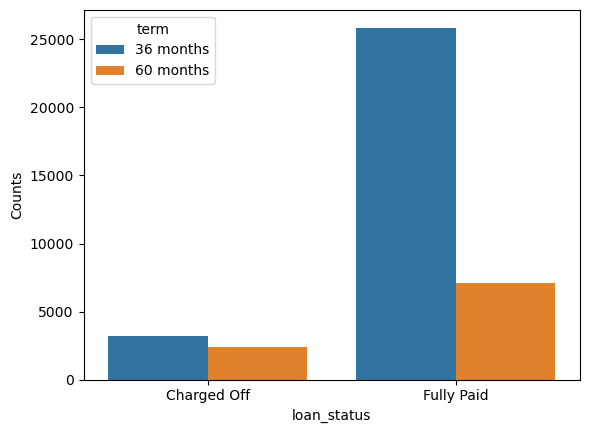

In [38]:
grouped_df = lending_club_df.groupby(['loan_status', 'term']).size().reset_index(name='Counts')

sns.barplot(x='loan_status', y='Counts', hue='term', data=grouped_df)
plt.show()

# RECOMMENDATIONS

- In order to prevent defaulting on the loans, it is best to set up a term of 36 months
- Considering that defaulted loans had higher interest rates, it is best to reduce them, considering that there is not much difference with respect to the annual income for either defaulters or non_defaulters
- We must pay special attention to those that have worked for at least 10 years or those who are in the starting of their careers
- We must carefully consider those who are paying rent or having a mortgage.
- We must take into consideration those that have a higher credit utilization ratio (revol_util)